# Series de tiempo y visualización de datos

Dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv

## Series de tiempo

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
236012,236013,02/27/2021,Zaporizhia Oblast,Ukraine,2021-02-28 05:22:20,69504.0,1132.0,65049.0
236013,236014,02/27/2021,Zeeland,Netherlands,2021-02-28 05:22:20,16480.0,178.0,0.0
236014,236015,02/27/2021,Zhejiang,Mainland China,2021-02-28 05:22:20,1321.0,1.0,1314.0
236015,236016,02/27/2021,Zhytomyr Oblast,Ukraine,2021-02-28 05:22:20,50582.0,834.0,44309.0


In [5]:
df.sample(10)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [6]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [7]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
236012,2021-02-27,Ukraine,69504.0,1132.0,65049.0
236013,2021-02-27,Netherlands,16480.0,178.0,0.0
236014,2021-02-27,Mainland China,1321.0,1.0,1314.0
236015,2021-02-27,Ukraine,50582.0,834.0,44309.0


In [8]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


In [9]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [10]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [11]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [12]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-02-23,112109754.0,2485434.0,63295144.0
2021-02-24,112554301.0,2497488.0,63504603.0
2021-02-25,113001412.0,2507624.0,63732295.0


In [13]:
df_time.diff().mean()

Confirmed    283045.218905
Deaths         6282.049751
Recovered    159809.092040
dtype: float64

In [14]:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-02-23,387865.0,11256.0,278630.0
2021-02-24,444547.0,12054.0,209459.0
2021-02-25,447111.0,10136.0,227692.0


In [15]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [16]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

In [17]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,1095.0,34.0,58.0
2020-01-24,939.0,26.0,37.0
2020-01-25,1435.0,42.0,40.0
2020-01-26,2116.0,56.0,54.0
...,...,...,...
2021-02-23,112109752.0,2485434.0,63295142.0
2021-02-24,112554299.0,2497488.0,63504601.0
2021-02-25,113001410.0,2507624.0,63732293.0


In [18]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9923.0,213.0,223.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39203.0,138226.0
2020-04-30,2401730.0,192450.0,837095.0
2020-05-31,2910555.0,138363.0,1626127.0
2020-06-30,4319738.0,138588.0,2711439.0
2020-07-31,7127382.0,168568.0,5019965.0
2020-08-31,7908965.0,171320.0,6449484.0
2020-09-30,8502572.0,163975.0,6847448.0


In [19]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [20]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.300000,21.300000,22.300000
2020-02-29,2623.689655,94.068966,1364.000000
2020-03-31,24885.870968,1264.612903,4458.903226
2020-04-30,80057.666667,6415.000000,27903.166667
2020-05-31,93888.870968,4463.322581,52455.709677
2020-06-30,143991.266667,4619.600000,90381.300000
2020-07-31,229915.548387,5437.677419,161934.354839
2020-08-31,255127.903226,5526.451613,208047.870968
2020-09-30,283419.066667,5465.833333,228248.266667


In [21]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-02-25 00:00:00,113001412.0,2507624.0,63732295.0
2021-02-25 12:00:00,NaN,NaN,NaN
2021-02-26 00:00:00,113415604.0,2517422.0,63992563.0


In [22]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-02-25 00:00:00,113001412.0,2507624.0,63732295.0
2021-02-25 12:00:00,113208508.0,2512523.0,63862429.0
2021-02-26 00:00:00,113415604.0,2517422.0,63992563.0


In [23]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [24]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
800,2021-02-25 00:00:00,113001412.0,2507624.0,63732295.0,0.977809
801,2021-02-25 12:00:00,113208508.0,2512523.0,63862429.0,0.977806
802,2021-02-26 00:00:00,113415604.0,2517422.0,63992563.0,0.977804
803,2021-02-26 12:00:00,113600169.5,2521411.5,64117924.0,0.977805


In [25]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960059
2020-04-30,0.935319
2020-05-31,0.933185
2020-06-30,0.945691
2020-07-31,0.957055
2020-08-31,0.964319
2020-09-30,0.968507


<AxesSubplot:xlabel='ObservationDate'>

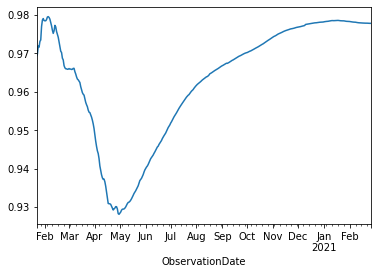

In [26]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

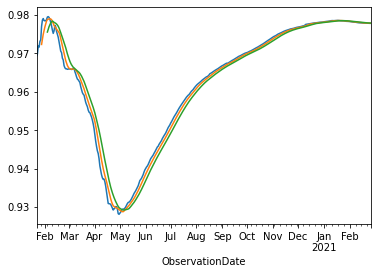

In [27]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

<AxesSubplot:xlabel='ObservationDate'>

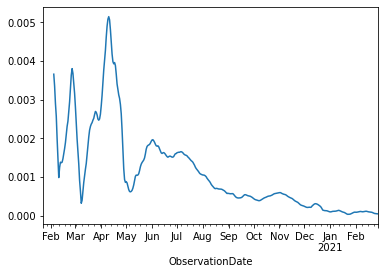

In [29]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

## Visualización de datos 

In [31]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
France                   3664050.0
UK                       3653272.0
US                       3563578.0
Turkey                   2693164.0
India                    2146777.0
                           ...    
The Bahamas                    1.0
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
Name: Confirmed, Length: 227, dtype: float64

In [32]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [33]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[69085 rows x 3 columns]

In [34]:
df_china = df_time.loc['Mainland China',:]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,1082.0,34.0,58.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
...,...,...,...
2021-02-23,89864.0,4636.0,84858.0
2021-02-24,89871.0,4636.0,84954.0
2021-02-25,89877.0,4636.0,84997.0


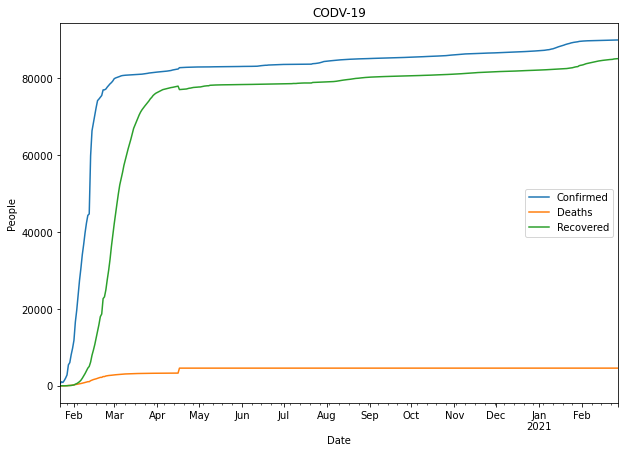

In [35]:
df_china.plot(figsize = (10,7), title = 'CODV-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

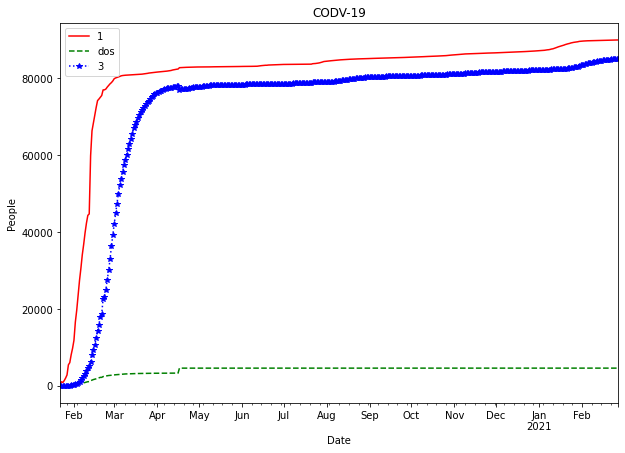

In [36]:
ax = df_china.plot(figsize = (10,7), title = 'CODV-19',
              legend = False,
              style = ['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [37]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,81524.0,3305.0,76062.0
2020-04-30,82874.0,4633.0,77900.0
2020-05-31,83017.0,4634.0,78307.0
2020-06-30,83534.0,4634.0,78480.0
2020-07-31,84337.0,4634.0,78990.0
2020-08-31,85058.0,4634.0,80206.0
2020-09-30,85412.0,4634.0,80587.0


<AxesSubplot:xlabel='ObservationDate'>

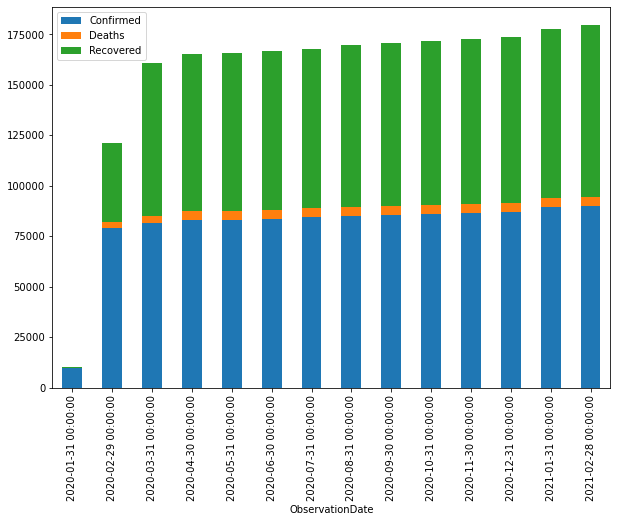

In [38]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

In [39]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,81524.0,3305.0,76062.0,2157.0
2020-04-30,82874.0,4633.0,77900.0,341.0
2020-05-31,83017.0,4634.0,78307.0,76.0
2020-06-30,83534.0,4634.0,78480.0,420.0
2020-07-31,84337.0,4634.0,78990.0,713.0
2020-08-31,85058.0,4634.0,80206.0,218.0
2020-09-30,85412.0,4634.0,80587.0,191.0


array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-04-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-05-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-06-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-07-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-08-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-09-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-10-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-11-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-12-31 00:00:00'>,
       <AxesSubplot:ylabel='2021-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2021-02-28 00:00:00'>], dtype=object)

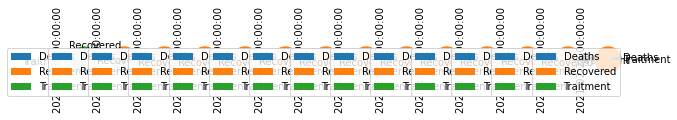

In [40]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

<AxesSubplot:>

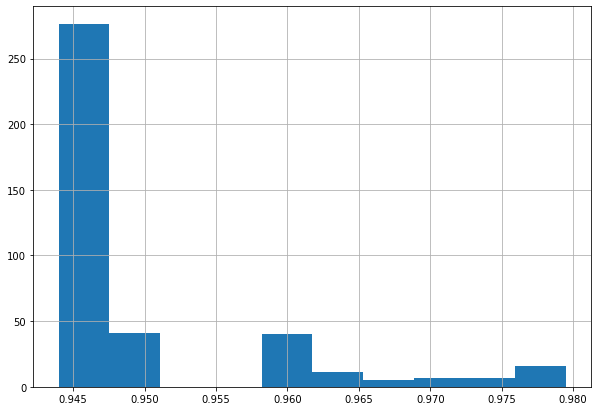

In [41]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins = 10)

<AxesSubplot:ylabel='Density'>

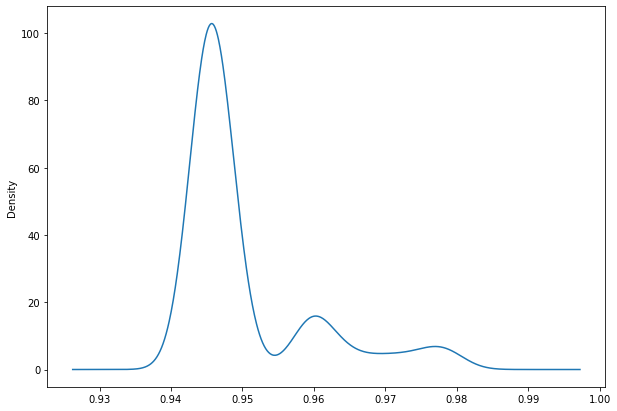

In [42]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))